In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('./data.csv')

display(data)

,Date,AppleStandTime,VO2Max,BasalEnergyBurned,HeartRateVariabilitySDNN,DistanceWalkingRunning,HeartRate,WalkingSpeed,AppleExerciseTime,ActiveEnergyBurned,...,StepCount,RespiratoryRate,Height,BodyMass,RestingHeartRate,DistanceCycling,OxygenSaturation,HeartRateRecoveryOneMinute,WalkingHeartRateAverage,SleepDuration
0,2022-09-30 00:00:00-07:00,92.0,NaN,1584.483,45.184712,11.248625,101.818279,2.838328,36.0,375.575,...,13732.0,17.261905,NaN,NaN,84.0,NaN,0.980000,NaN,124.0,7.266944
1,2022-10-01 00:00:00-07:00,64.0,NaN,1608.689,43.255628,7.035127,88.495079,2.680329,5.0,268.497,...,9031.0,NaN,NaN,NaN,69.0,NaN,0.980000,NaN,98.0,7.869444
2,2022-10-02 00:00:00-07:00,174.0,NaN,1619.268,35.348486,17.103990,88.228124,2.463715,28.0,402.102,...,22561.5,NaN,NaN,NaN,66.0,NaN,0.950000,NaN,111.0,7.779722
3,2022-10-03 00:00:00-07:00,68.0,NaN,1548.273,46.680448,6.793624,77.691389,2.754517,18.0,279.552,...,8616.0,17.406250,NaN,NaN,68.0,NaN,0.960000,NaN,112.5,8.640000
4,2022-10-04 00:00:00-07:00,30.0,NaN,1630.433,46.081659,1.772886,83.734035,2.348783,16.0,249.938,...,2355.0,17.244681,NaN,NaN,75.0,1.577701,0.967273,NaN,103.0,7.346389
5,2022-10-05 00:00:00-07:00,25.0,NaN,1569.611,49.755983,3.000718,74.730330,2.278479,5.0,187.777,...,3818.0,17.630435,NaN,NaN,63.0,0.000000,0.963750,NaN,104.0,7.396944
6,2022-10-06 00:00:00-07:00,41.0,NaN,1533.222,55.268881,1.854570,79.311703,2.427076,32.0,303.612,...,2283.5,17.282609,NaN,NaN,64.0,6.800452,0.961667,NaN,79.0,8.723333
7,2022-10-07 00:00:00-07:00,88.0,NaN,1619.935,45.285908,3.421866,90.429827,2.435210,46.0,427.184,...,4389.5,16.974138,NaN,NaN,80.0,8.912609,0.969231,NaN,116.5,8.985556
8,2022-10-08 00:00:00-07:00,57.0,41.55,1592.566,48.483081,5.412050,111.385774,NaN,41.0,395.806,...,6743.0,16.797619,NaN,NaN,67.0,0.000000,0.975714,21.883576,NaN,8.336389
9,2022-10-09 00:00:00-07:00,31.0,0.00,1576.183,43.842216,0.907187,74.995929,2.460630,3.0,208.502,...,1207.0,17.198113,NaN,NaN,63.0,0.000000,0.956667,0.000000,NaN,9.320833


<AxesSubplot: ylabel='DistanceWalkingRunning'>

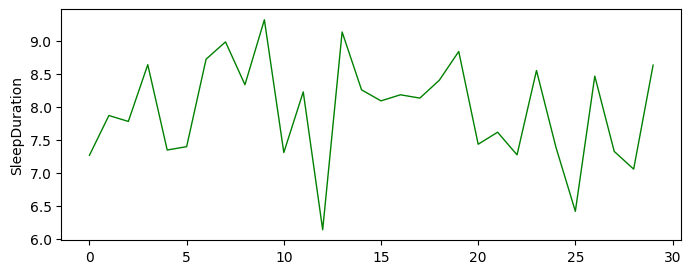

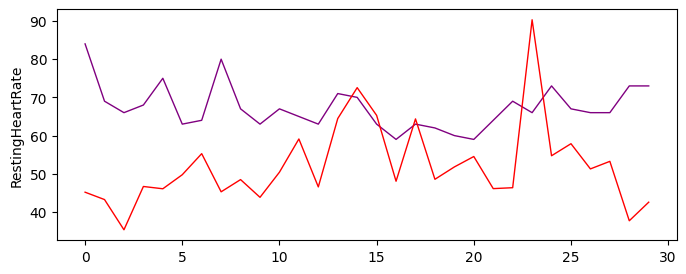

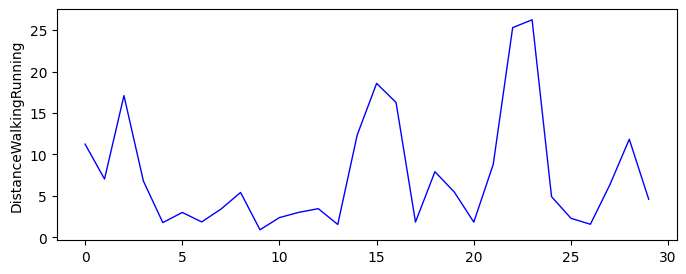

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,3)) 
sns.lineplot(data=data['SleepDuration'], color='green', linewidth=1)

fig = plt.figure(figsize=(8,3)) 
sns.lineplot(data=data['RestingHeartRate'], color='purple', linewidth=1)
sns.lineplot(data=data['HeartRateVariabilitySDNN'], color='red', linewidth=1)

fig = plt.figure(figsize=(8,3)) 
# sns.lineplot(data=data['StepCount'], color='purple', linewidth=1)
sns.lineplot(data=data['DistanceWalkingRunning'], color='blue', linewidth=1)

<AxesSubplot: >

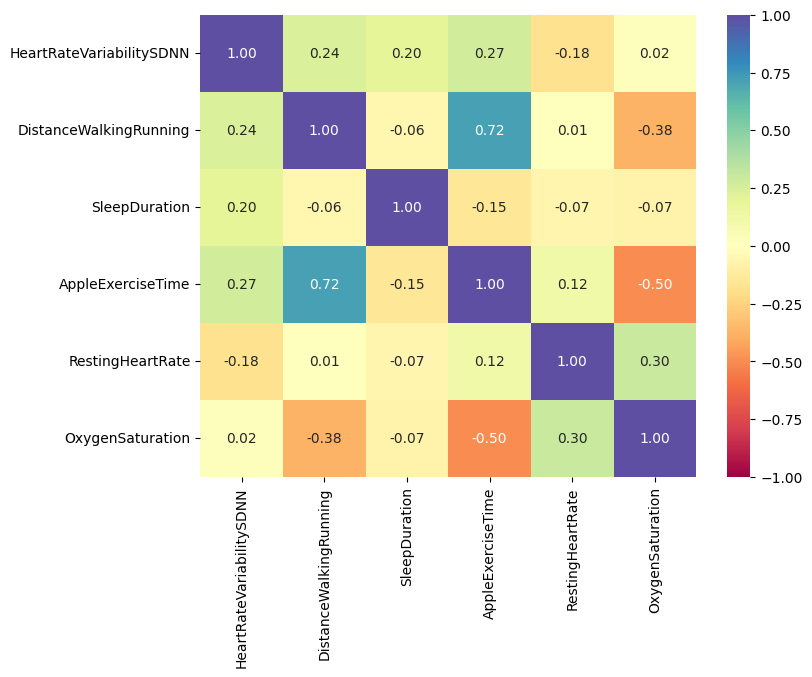

In [4]:
# data = data.drop(['BodyMass', 'Height'], axis=1)

cm = data[['HeartRateVariabilitySDNN', 'DistanceWalkingRunning', 'SleepDuration', 'AppleExerciseTime', 'RestingHeartRate', 'OxygenSaturation']].corr()

fig = plt.figure(figsize=(8,6)) 
sns.heatmap(cm, annot=True, fmt=".2f", vmin=-1.0, vmax=+1.0, cmap='Spectral')

<Figure size 1200x1200 with 0 Axes>

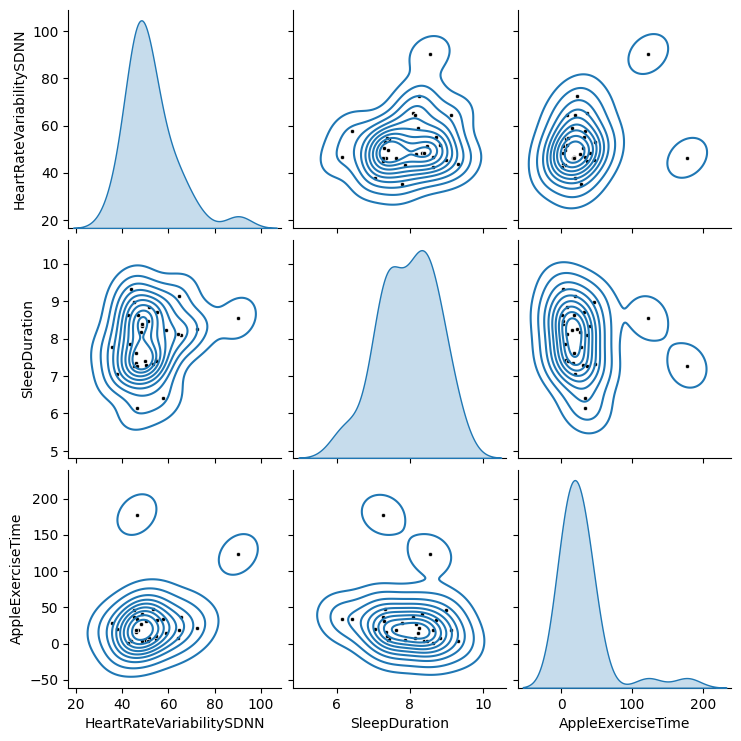

In [5]:
# pairwise plot
fig = plt.figure(figsize=(12, 12)) 

g = sns.pairplot(data[['HeartRateVariabilitySDNN', 'SleepDuration', 'AppleExerciseTime']], kind='kde')

g.map_offdiag(sns.scatterplot, marker='.', color='black')

In [29]:
import statsmodels.formula.api as smf

# OLS regression
model = smf.ols('HeartRateVariabilitySDNN ~ 1 + SleepDuration + DistanceWalkingRunning', data=data.dropna())
results = model.fit()
results.summary()

/opt/homebrew/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     HeartRateVariabilitySDNN   R-squared:                       0.199
Model:                                  OLS   Adj. R-squared:                 -0.122
Method:                       Least Squares   F-statistic:                    0.6193
Date:                      Sun, 30 Oct 2022   Prob (F-statistic):              0.575
Time:                              20:26:08   Log-Likelihood:                -28.412
No. Observations:                         8   AIC:                             62.82
Df Residuals:                             5   BIC:                             63.06
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6.8754     42.246      0.163      0.877    -101.721     115.471
SleepDuration              6.1413      5.675      1.082      0.329      -8.447      20.729
DistanceWalkingRunning    -0.0427      0.533     -0.080      0.939      -1.412       1.326
==============================================================================
Omnibus:                        0.988   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.610   Jarque-Bera (JB):                0.735
Skew:                           0.559   Prob(JB):                        0.692
Kurtosis:                       2.023   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""